### TEL354 - Minería de datos
# Taller 3

Nombre: Daniel Alejandro Barriga Villanueva        
Rol:202030517-K         
RUT: 20731884-1              
Correo: daniel.barriga@usm.cl             

**Objetivo**

El objetivo del Taller 3 es encontrar reglas de decisión para clasificar animales en una de las 7 clases: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 

El archivo contiene atributos binarios de 99 animales diferentes, donde `0` indica ausencia y `1` presencia de esa característica, con excepción de la columna `patas` que es numérica entre `0` y `8`.

1. Cargar los datos del archivo `animales.csv` a un DataFrame y mostrarlo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('animales.csv')
df

animal         clase  pelo  plumas  huevos  leche  vuela   
0   oso hormiguero      Mamífero     1       0       0      1      0  \
1         antílope      Mamífero     1       0       0      1      0   
2             bajo           Pez     0       0       1      0      0   
3              oso      Mamífero     1       0       0      1      0   
4           jabalí      Mamífero     1       0       0      1      0   
..             ...           ...   ...     ...     ...    ...    ...   
94         canguro      Mamífero     1       0       0      1      0   
95          avispa       Insecto     1       0       1      0      1   
96            lobo      Mamífero     1       0       0      1      0   
97          gusano  Invertebrado     0       0       1      0      0   
98       reyezuelo           Ave     0       1       1      0      1   

    acuático  depredador  dentado  columna vertebral  respira  venenoso   
0          0           1        1                  1        1         0  \
1          0           0        1                  1        1         0   
2          1           1        1                  1        0         0   
3          0           1        1                  1        1         0   
4          0           1        1                  1        1         0   
..       ...         ...      ...                ...      ...       ...   
94         0           0        1                  1        1         0   
95         0           0        0                  0        1         1   
96         0           1        1                  1        1         0   
97         0           0        0                  0        1         0   
98         0           0        0                  1        1         0   

    aletas  patas  cola  doméstico  
0        0      4     0          0  
1        0      4     1          0  
2        1      0     1          0  
3        0      4     0          0  
4        0      4     1          0  
..     ...    ...   ...        ...  
94       0      2     1          0  
95       0      6     0          0  
96       0      4     1          0  
97       0      0     0          0  
98       0      2     1          0  

[99 rows x 17 columns]

2. Generar el conjunto `X` con todas las filas del DataFrame y todas las columnas con excepción de `animal` y `clase`.

In [3]:
X = df.drop(columns=['animal','clase'])
X

pelo  plumas  huevos  leche  vuela  acuático  depredador  dentado   
0      1       0       0      1      0         0           1        1  \
1      1       0       0      1      0         0           0        1   
2      0       0       1      0      0         1           1        1   
3      1       0       0      1      0         0           1        1   
4      1       0       0      1      0         0           1        1   
..   ...     ...     ...    ...    ...       ...         ...      ...   
94     1       0       0      1      0         0           0        1   
95     1       0       1      0      1         0           0        0   
96     1       0       0      1      0         0           1        1   
97     0       0       1      0      0         0           0        0   
98     0       1       1      0      1         0           0        0   

    columna vertebral  respira  venenoso  aletas  patas  cola  doméstico  
0                   1        1         0       0      4     0          0  
1                   1        1         0       0      4     1          0  
2                   1        0         0       1      0     1          0  
3                   1        1         0       0      4     0          0  
4                   1        1         0       0      4     1          0  
..                ...      ...       ...     ...    ...   ...        ...  
94                  1        1         0       0      2     1          0  
95                  0        1         1       0      6     0          0  
96                  1        1         0       0      4     1          0  
97                  0        1         0       0      0     0          0  
98                  1        1         0       0      2     1          0  

[99 rows x 15 columns]

3. La variable objetivo `y` será la columna `clase`, pero mapeando cada categoría a un valor numérico según el diccionario `d`.

In [4]:
d = {'Mamífero': 1,
 'Ave': 2,
 'Reptil': 3,
 'Pez': 4,
 'Anfibio': 5,
 'Insecto': 6,
 'Invertebrado': 7}

In [5]:
# Variable objetivo sin mapear con valor numerico segun diccionario d
y = df.iloc[:,1:2]
y

clase
0       Mamífero
1       Mamífero
2            Pez
3       Mamífero
4       Mamífero
..           ...
94      Mamífero
95       Insecto
96      Mamífero
97  Invertebrado
98           Ave

[99 rows x 1 columns]

In [6]:
# Variable objetivo mapeada con diccionario 'd'
vobj = y['clase'].map(d)
vobj

0     1
1     1
2     4
3     1
4     1
     ..
94    1
95    6
96    1
97    7
98    2
Name: clase, Length: 99, dtype: int64

4. Separar los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y testing (`X_test`, `y_test`) usando la función `train_test_split()` con `test_size=0.1`.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, vobj, test_size=0.1, random_state=500)


In [9]:
x_train

pelo  plumas  huevos  leche  vuela  acuático  depredador  dentado   
21     0       1       1      0      1         1           0        0  \
39     0       1       1      0      0         0           1        0   
58     0       0       1      0      0         1           1        1   
74     0       0       0      0      0         1           1        1   
69     0       1       1      0      0         0           1        0   
..   ...     ...     ...    ...    ...       ...         ...      ...   
78     0       0       1      0      0         0           1        1   
17     1       0       0      1      0         0           0        1   
65     1       0       0      1      0         0           1        1   
55     0       1       1      0      1         0           0        0   
90     0       0       1      0      0         1           1        1   

    columna vertebral  respira  venenoso  aletas  patas  cola  doméstico  
21                  1        1         0       0      2     1          0  
39                  1        1         0       0      2     1          0  
58                  1        0         0       1      0     1          0  
74                  1        0         1       0      0     1          0  
69                  1        1         0       0      2     1          0  
..                ...      ...       ...     ...    ...   ...        ...  
78                  1        1         0       0      0     1          0  
17                  1        1         0       0      4     1          0  
65                  1        1         0       0      4     1          0  
55                  1        1         0       0      2     1          1  
90                  1        0         0       1      0     1          0  

[89 rows x 15 columns]

In [10]:
x_test

pelo  plumas  huevos  leche  vuela  acuático  depredador  dentado   
64     0       0       0      1      0         1           1        1  \
86     0       0       1      0      0         0           0        0   
75     0       0       1      0      0         1           1        0   
7      0       0       1      0      0         1           0        1   
91     1       0       0      1      1         0           0        1   
48     1       0       0      1      0         0           1        1   
1      1       0       0      1      0         0           0        1   
50     0       0       1      0      0         1           1        1   
73     1       0       0      1      0         1           1        1   
93     0       1       1      0      1         0           1        0   

    columna vertebral  respira  venenoso  aletas  patas  cola  doméstico  
64                  1        1         0       1      0     1          0  
86                  0        1         0       0      6     0          0  
75                  0        0         1       0      0     0          0  
7                   1        0         0       1      0     1          1  
91                  1        1         0       0      2     1          0  
48                  1        1         0       0      4     1          0  
1                   1        1         0       0      4     1          0  
50                  1        1         0       0      4     1          0  
73                  1        1         0       1      2     1          0  
93                  1        1         0       0      2     1          0

In [11]:
y_train

21    2
39    2
58    4
74    3
69    2
     ..
78    3
17    1
65    1
55    2
90    4
Name: clase, Length: 89, dtype: int64

In [12]:
y_test

64    1
86    6
75    7
7     4
91    1
48    1
1     1
50    5
73    1
93    2
Name: clase, dtype: int64

5. Entrenar un modelo de clasificación de tipo `DecisionTreeClassifier` con los datos de entrenamiento.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

6. Predecir sobre el conjunto de testing `X_test` usando la función `predict()` y generar el vector `y_pred` con el resultado de la predicción.

In [15]:
y_pred = clf.predict(x_test)
y_pred

array([1, 6, 7, 4, 1, 1, 1, 3, 1, 2])

7. Mostrar el `accuracy_score` del modelo sobre los datos de testing `y_test`.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

La exactitud del modelo es de un 90% cuando la semilla se establece en un valor de 42, para abarcar las 7 clases existentes.

8. Entregar la Matriz de Confusión e indicar que clases de animales confunde el modelo.

In [18]:
import numpy as np
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix



array([[5, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

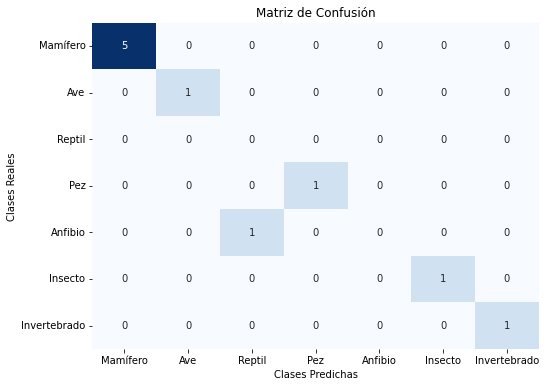

In [22]:
import seaborn as sns
# Visualizar la matriz de confusión en un gráfico
class_names=['Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')
plt.show()

- Debido a que no se encuentran en la diagonal principal, las clases que confunden el modelo son **reptil** y **anfibio**, ya que sus valores represetan un valor incorrecto en la predicción. Es por esto que se genera un 1 entre anfibio y reptil, fuera de la diagonal principal, y en sus intecepciónes correspondientes en la diagonal no existe un valor dentro de la matriz, ya que no se realizo una predicción en el modelo.

9. Plotear el árbol de decisión con la función `plot_tree()`, cuyo primer parámetro es el clasificador y luego:
- El parámetro `feature_names` son los nombres de las columnas en el conjunto `X`.
- El parámetro `class_names` es una lista con las clases de animales, en este orden: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 
- El parámetro `filled`, permite de manera opcional, colorear los nodos de la misma clase si se iguala a `True`.

Asegúrese de establecer un tamaño adecuado para que el gráfico se vea (Por ejemplo, `figsize=(25, 20)`).

In [20]:
from sklearn.tree import plot_tree

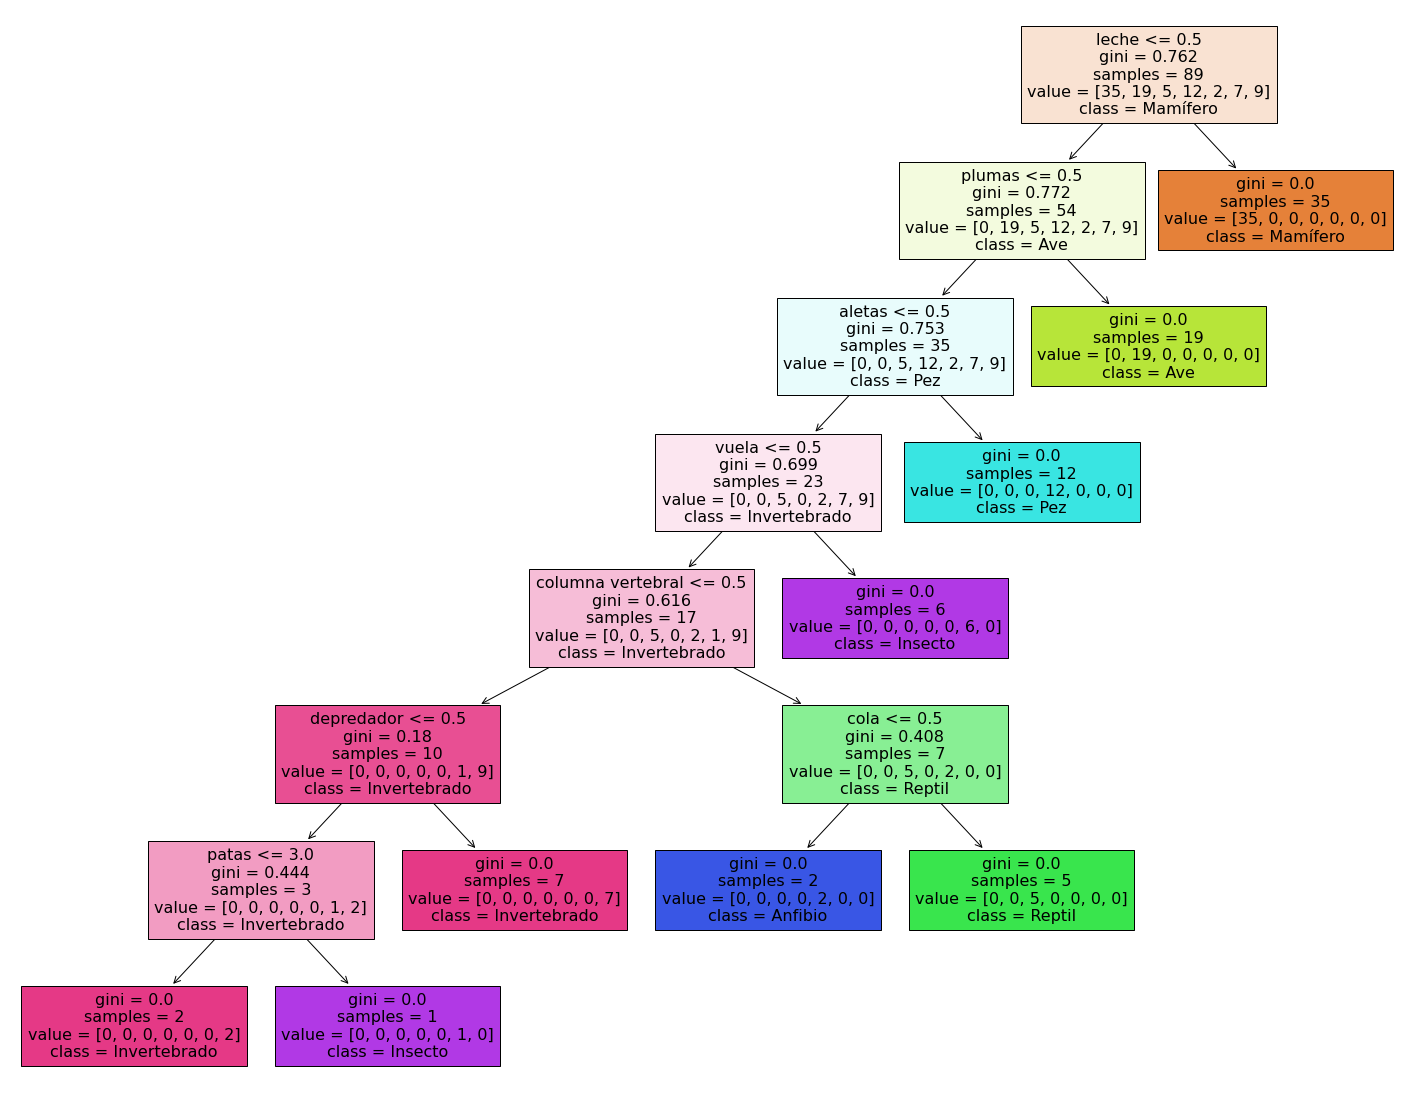

In [21]:
plt.figure(figsize=(25, 20))

# Plotear el árbol de decisión
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'],
    filled=True,
)

# Mostrar el gráfico
plt.show()

10. Para cada hoja del árbol, entregue el número de animales en esa clase, indicando el porcentaje con respecto al total, y las condiciones que se deben cumplir para pertenecer a esa clase. Por ejemplo:

- 35 mamíferos dan leche, lo que representa el 100% de esta clase.
- 6 insectos no dan leche, no tienen plumas, no tienen aletas y vuelan, lo que representa el 85.71% de esta clase.
- ...

Los arboles de desiciónespecifican que la a la izquierda es si y a la derecha es no. Lo que indica que si la condición se cumple el movimiento se realiza a la izquirda, de lo contrario, el movimiento es hacia la derecha. Quedando el siguiente analisis.      

Si la condición se cumple (leche <= 0.5), nos movemos hacia la izquierda; de lo contrario, nos movemos hacia la derecha.     

Por lo que en la primera hoja se obtienen los siguientes datos:   
Porcentajes de clase:    
- Mamíferos: (35 / 89) * 100 = 39.33%     
- Aves: (19 / 89) * 100 = 21.35%     
- Reptiles: (5 / 89) * 100 = 5.62%     
- Peces: (12 / 89) * 100 = 13.48%     
- Anfibios: (2 / 89) * 100 = 2.25%    
- Insectos: (7 / 89) * 100 = 7.87%   
- Invertebrados: (9 / 89) * 100 = 10.11%   

de esa hoja del arbol, se divide a derecha que es leche > 0.5, los cual la totalidad (100%), son mamiferos.      
Mientras que a la izquierda se obtiene una muestra de 54 animales, y dividiendose en las siguientes clases.            
se obtiene una Distribución de clases: [0 Mamíferos, 19 Aves, 5 Reptiles, 12 Peces, 2 Anfibios, 7 Insectos, 9 Invertebrados], con clase mayoritaria aves, con los siguientes porcentajes:            
- Aves: (19 / 54) * 100 = 35.19%            
- Reptiles: (5 / 54) * 100 = 9.26%            
- Peces: (12 / 54) * 100 = 22.22%            
- Anfibios: (2 / 54) * 100 = 3.70%            
- Insectos: (7 / 54) * 100 = 12.96%            
- Invertebrados: (9 / 54) * 100 = 16.67%            

Cabe destacar que en esta hoja se considera la condición si tiene plumas <=0.5, correspondiente a la clase aves, si la condición no se cumple nos movemos a la derecha y se obtiene un 100% que es la clase de las aves, que son 19.            
En caso de cumplirse la condición, se desplaza a la izquierda, obteniendo la clase mayoritaria peces, se obtiene los siguientes porcentajes:            
- Reptiles: (5 / 35) * 100 = 14.29%            
- Peces: (12 / 35) * 100 = 34.29%            
- Anfibios: (2 / 35) * 100 = 5.71%            
- Insectos: (7 / 35) * 100 = 20.00%            
- Invertebrados: (9 / 35) * 100 = 25.71%            
Cabe destacar que en esta hoja se considera la condición si tiene aletas <=0.5, correspondiente a la clase pez, si la condición no se cumple nos movemos a la derecha y se obtiene un 100% que es la clase de pez, que son 12.            
En caso de cumplirse la condición, se desplaza a la izquierda, teniendo la clase mayoritaria invertebrados, se obtiene los siguientes porcentajes:            
- Reptiles: (5 / 23) * 100 = 21.74%            
- Anfibios: (2 / 23) * 100 = 8.70%            
- Insectos: (7 / 23) * 100 = 30.43%            
- Invertebrados: (9 / 23) * 100 = 39.13%            
Cabe destacar que en esta hoja se considera la condición si tiene vuela <=0.5, correspondiente a la clase insecto, si la condición no se cumple nos movemos a la derecha y se obtiene un 100% que es la clase de insecto, que son 6.            
En caso de cumplirse la condición, se desplaza a la izquierda, teniendo la clase mayoritaria es invertebrado se obtiene los siguientes porcentajes:            
- Reptiles: (5 / 17) * 100 = 29.41%            
- Anfibios: (2 / 17) * 100 = 11.76%            
- Insectos: (1 / 17) * 100 = 5.88%            
- Invertebrados: (9 / 17) * 100 = 52.94%            

En ese caso a la derecha se analiza tambien se analizará los que tengan cola <=0.5, con clase mayoritaria Reptil teniendo un universo de 7 animales, las cuales, a la derecha se obtienen 5 reptiles, lo cual es el 100%, mientras que a la izquierda se obtiene el 100% de anfibio que son 2.            

En el caso de la izquierda de la hoja de invertembrado anterior, en la cual se indica que los depredadores tienen <= 0.5 como condiciónse obtiene:            
- Insectos: (1 / 17) * 100 = 5.88%            
- Invertebrados: (9 / 17) * 100 = 52.94%            

En este nodo, la condición es que el animal no puede ser depredador (depredador <= 0.5). La clase mayoritaria en este nodo es "Invertebrado" con un 52.94% de las muestras en este nodo. Puedes seguir este enfoque para analizar otros nodos en el árbol de decisiones.            

A la derecha de la hoja anterior se obtiene 7 invertebrados, que es un 100% de la muestra.            

A la izquierda de la hoja se obtiene un universo de 3 invertebrados y se debe analizar la condición patas <= 3, y sus porcentajes son:            
- Insectos: (1 / 17) * 100 = 5.88%            
- Invertebrados: (2 / 17) * 100 = 11.76%            

En este nodo, la condición es que el animal tiene 0.3 patas o menos (patas <= 0.3). La clase mayoritaria en este nodo es "Invertebrado" con un 11.76% de las muestras en este nodo. Puedes seguir este enfoque para analizar otros nodos en el árbol de decisiones.            

y al analizar el final del arbol, se obtiene que un insecto (100%), no tiene patas, y la derecha, 2% si tiene patas.             



